<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 - Neural Network - From Scratch <br>
<font color=0CBCDF size=4>
   &#x1F335; Amirhossein Akbari  &#x1F335;
</div>

____

<font color=9999FF size=4>
&#x1F388; Full Name : Radin Cheraghi
<br>
<font color=9999FF size=4>
&#x1F388; Student Number : 401105815

<font color=#ffb578 size=3>
you are free to modify, add, or remove any cells as you see fit to complete your tasks. Feel free to change any of the provided code or content to better suit your understanding and approach to the problems.

- **Questions**: If you have any questions or require clarifications as you work through the notebook, please do not hesitate to ask. You can post your queries on Quera or reach out via Telegram.
- **Feedback**: We encourage you to seek feedback and engage in discussions to enhance your learning experience and improve your solutions.
</font>

In [2]:
!pip install future
!pip install pandas
!pip install torchvision

In [3]:
from utils.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from utils.data import get_MNIST_data, get_normalized_MNIST_data, get_california_housing_data, get_california_housing_normalized__data
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
from utils.solver import *
import pandas as pd
from sklearn.datasets import fetch_california_housing



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def print_mean_std(x,axis=0):
    print(f"  means: {x.mean(axis=axis)}")
    print(f"  stds:  {x.std(axis=axis)}\n")

# Fully-Connected Neural Nets
In this exercise we will implement fully-connected networks using a modular approach. For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

After implementing a bunch of layers this way, we will be able to easily combine them to build classifiers with different architectures.

# Affine layer: forward
Implement the `affine_forward` function.

In [4]:
def affine_forward(x, w, b):
    """
    Performs the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a batch of N
    samples, where each sample x[i] has dimensions (d_1, ..., d_k). We
    will reshape each input into a flat vector with size D = d_1 * ... * d_k,
    and then transform it into an output vector of dimension M.

    Parameters:
    - x: A numpy array representing the input data with shape (N, d_1, ..., d_k)
    - w: A numpy array of weights with shape (D, M)
    - b: A numpy array of biases with shape (M,)

    Returns:
    - out: The output of the affine transformation, with shape (N, M)
    - cache: A tuple (x, w, b) to store intermediate variables for backpropagation
    """
    ###########################################################################
    # Task: Implement the affine forward pass. Store the computed result in   #
    # the variable 'out'. You'll need to reshape the input into rows.         #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    N = x.shape[0]
    x_reshaped = x.reshape(N,-1)
    out = x_reshaped @ w + b
    cache = (x, w, b)
    return out, cache

You can test your implementaion by running the following:

In [5]:
# Testing the affine_forward function

# Define the parameters for the test
num_inputs = 2                          # Number of input samples in the batch
input_shape = (4, 5, 6)                  # Shape of each input sample (d_1, d_2, d_3)
output_dim = 3                           # Dimensionality of the output

# Calculate the size of the input and weight arrays
input_size = num_inputs * np.prod(input_shape)   # Total number of elements in input array
weight_size = output_dim * np.prod(input_shape)  # Total number of elements in weight array

# Create test input data, weights, and biases
x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

# Perform the forward pass using the affine_forward function
out, _ = affine_forward(x, w, b)

# Define the correct output to compare against
correct_out = np.array([[1.49834967, 1.70660132, 1.91485297],
                        [3.25553199, 3.5141327,  3.77273342]])

# Check the difference between computed output and expected output
# The error should be around e-9 or smaller to pass the test.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769849468192957e-10


# Affine layer: backward
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

In [6]:
def affine_backward(dout, cache):
    """
    Performs the backward pass for an affine (fully-connected) layer.

    Parameters:
    - dout: Upstream gradient from the next layer, with shape (N, M)
    - cache: A tuple containing:
      - x: Input data of shape (N, d_1, ..., d_k), where N is the batch size
      - w: Weight matrix of shape (D, M), where D is the flattened dimension of x
      - b: Bias vector of shape (M,)

    Returns:
    - dx: Gradient of the loss with respect to x, with shape (N, d_1, ..., d_k)
    - dw: Gradient of the loss with respect to w, with shape (D, M)
    - db: Gradient of the loss with respect to b, with shape (M,)
    """
    ###########################################################################
    # Task: Implement the backward pass for the affine layer, calculating    #
    # the gradients dx, dw, and db.                                           #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    x, w, b = cache
    N = x.shape[0]
    x_reshaped = x.reshape(N,-1)

    dx_reshaped = dout @ w.T
    dx = dx_reshaped.reshape(*x.shape)
    dw = x_reshaped.T @ dout
    db = dout.sum(axis = 0)

    return dx, dw, db


In [7]:
# Test the affine_backward function

# Set a random seed for reproducibility
np.random.seed(231)

# Generate random test inputs
x = np.random.randn(10, 2, 3)          # Input data of shape (N=10, d_1=2, d_2=3)
w = np.random.randn(6, 5)               # Weights with shape (D=6, M=5)
b = np.random.randn(5)                  # Biases with shape (M=5)
dout = np.random.randn(10, 5)           # Upstream gradient with shape (N=10, M=5)

# Compute numerical gradients for dx, dw, and db to validate the backward pass
dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

# Perform forward pass to cache variables needed for the backward pass
_, cache = affine_forward(x, w, b)

# Use the affine_backward function to compute analytical gradients
dx, dw, db = affine_backward(dout, cache)

# Print the relative error between analytical and numerical gradients
# The error should be small, ideally around e-10 or less, to confirm accuracy
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))  # Check error for gradient dx
print('dw error: ', rel_error(dw_num, dw))  # Check error for gradient dw
print('db error: ', rel_error(db_num, db))  # Check error for gradient db

Testing affine_backward function:
dx error:  5.399100368651805e-11
dw error:  9.904211865398145e-11
db error:  2.4122867568119087e-11


# ReLU activation: forward
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using numeric gradient checking.

In [8]:
def relu_forward(x):
    """
    Performs the forward pass for a ReLU (Rectified Linear Unit) layer.

    Parameter:
    - x: Input data, can be of any shape

    Returns:
    - out: Output data, with the same shape as x, where each element is the result
           of applying the ReLU activation (i.e., max(0, x))
    - cache: A cached copy of the input x, saved for use in the backward pass
    """
    ###########################################################################
    # Task: Implement the forward pass for the ReLU layer.                    #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    cache = x.copy()
    out = np.maximum(0,x)
    return out, cache


In [9]:
# Test the relu_forward function

# Create test input data
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)  # Input array shaped (3, 4)

# Perform the forward pass using the relu_forward function
out, _ = relu_forward(x)

# Define the expected output for comparison
correct_out = np.array([[0.,         0.,         0.,         0.        ],
                        [0.,         0.,         0.04545455, 0.13636364],
                        [0.22727273, 0.31818182, 0.40909091, 0.5       ]])

# Calculate and print the difference between computed output and expected output
# The error should ideally be around e-8 to confirm correct implementation
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))


Testing relu_forward function:
difference:  4.999999798022158e-08


# ReLU activation: backward
Now implement the backward pass for the ReLU activation function in the `relu_backward` function.

In [10]:
def relu_backward(dout, cache):
    """
    Performs the backward pass for a ReLU (Rectified Linear Unit) layer.

    Parameters:
    - dout: Gradient from the upstream layer, with the same shape as the input x
    - cache: Cached input x from the forward pass, also of the same shape as dout

    Returns:
    - dx: Gradient of the loss with respect to x, where elements are set to the
          upstream gradient (dout) wherever x was positive during the forward pass,
          and zero elsewhere.
    """
    ###########################################################################
    # Task: Implement the backward pass for the ReLU layer, computing the     #
    # gradient dx based on the upstream gradient dout and cached input x.     #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    x = cache
    dx = dout * (x > 0)
    return dx


You can test your implementation using numeric gradient checking:

In [11]:
# Test the relu_backward function

# Set a random seed for reproducibility
np.random.seed(231)

# Generate random test input and upstream gradient
x = np.random.randn(10, 10)              # Input data shaped (10, 10)
dout = np.random.randn(*x.shape)         # Upstream gradient with the same shape as x

# Compute the numerical gradient for dx to validate the backward pass
dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

# Perform the forward pass to cache the input for use in the backward pass
_, cache = relu_forward(x)

# Compute the analytical gradient using the relu_backward function
dx = relu_backward(dout, cache)

# Print the relative error between analytical and numerical gradients
# The error should ideally be around e-12 to confirm accurate implementation
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


# Sigmoid activation: forward
Implement the forward pass for the Sigmoid activation function in the `sigmoid_forward` function and test your implementation using numeric gradient checking.

In [12]:
def sigmoid_forward(x):
    """
    Performs the forward pass for a Sigmoid activation layer.

    Parameter:
    - x: Input data of any shape

    Returns:
    - out: Output after applying the Sigmoid function, with the same shape as x
    - cache: A cached copy of the input x, used for the backward pass
    """
    ###########################################################################
    # Task: Implement the forward pass for the Sigmoid layer by applying the  #
    # Sigmoid function to each element in x.                                  #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    cache = x.copy()
    out = 1 / (1 + np.exp(-x))
    return out, cache


In [13]:
# Test the sigmoid_forward function

# Generate test input data
x = np.linspace(-6, 6, num=12).reshape(3, 4)  # Input array shaped (3, 4)

# Perform the forward pass using the sigmoid_forward function
out, _ = sigmoid_forward(x)

# Define the expected output for comparison
correct_out = np.array([[0.00247262, 0.00732514, 0.0214955,  0.06138311],
                        [0.16296047, 0.36691963, 0.63308037, 0.83703953],
                        [0.93861689, 0.9785045,  0.99267486, 0.99752738]])

# Calculate and print the difference between computed output and expected output
# The error should ideally be around e-7 to confirm the correct implementation
print('Testing sigmoid_forward function:')
print('difference: ', rel_error(out, correct_out))


Testing sigmoid_forward function:
difference:  6.383174040859927e-07


# Sigmoid activation: backward
Now implement the backward pass for the Sigmoid activation function in the `sigmoid_backward` function.

In [14]:
def sigmoid_backward(dout, cache):
    """
    Performs the backward pass for a Sigmoid activation layer.

    Parameters:
    - dout: Gradient from the upstream layer, with the same shape as the input x
    - cache: Cached input x from the forward pass, which has the same shape as dout

    Returns:
    - dx: Gradient of the loss with respect to x, calculated based on the
          derivative of the Sigmoid function
    """
    ###########################################################################
    # Task: Implement the backward pass for the Sigmoid layer, computing the  #
    # gradient dx based on the upstream gradient dout and the cached input x. #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    x = cache
    sigma_x = 1 / (1 + np.exp(-x))
    d_sigma = sigma_x * (1 - sigma_x)
    dx = dout * d_sigma
    return dx

You can test your implementation using numeric gradient checking:

In [15]:
# Test the sigmoid_backward function

# Set a random seed for reproducibility
np.random.seed(231)

# Generate random test input and upstream gradient
x = np.random.randn(10, 10)              # Input data shaped (10, 10)
dout = np.random.randn(*x.shape)         # Upstream gradient with the same shape as x

# Compute the numerical gradient for dx to validate the backward pass
dx_num = eval_numerical_gradient_array(lambda x: sigmoid_forward(x)[0], x, dout)

# Perform the forward pass to cache the input for use in the backward pass
_, cache = sigmoid_forward(x)

# Compute the analytical gradient using the sigmoid_backward function
dx = sigmoid_backward(dout, cache)

# Print the relative error between analytical and numerical gradients
# The error should ideally be around e-11 to confirm accurate implementation
print('Testing sigmoid_backward function:')
print('dx error: ', rel_error(dx_num, dx))


Testing sigmoid_backward function:
dx error:  3.446520386706568e-11


# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. Implement the forward and backward pass for the affine layer followed by a ReLU nonlinearity in the `affine_relu_forward` and `affine_relu_backward` functions.

In [16]:
def affine_relu_forward(x, w, b):
    """
    A convenience layer that performs an affine transformation followed by a ReLU activation.

    Parameters:
    - x: Input to the affine layer
    - w, b: Weights and biases for the affine layer

    Returns:
    - out: Output after applying the affine transformation and ReLU activation
    - cache: A cache object containing intermediate values needed for the backward pass
    """
    ###########################################################################
    # Task: Implement the forward pass for the affine-ReLU layer. First,      #
    # apply the affine transformation, then apply the ReLU activation.        #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    z, fc_cache = affine_forward(x, w, b)
    out, relu_cache = relu_forward(z)
    cache = (fc_cache, relu_cache)
    return out, cache


In [17]:
def affine_relu_backward(dout, cache):
    """
    Performs the backward pass for the affine-ReLU convenience layer.

    Parameters:
    - dout: Gradient from the upstream layer, with any shape
    - cache: Tuple of (fc_cache, relu_cache) containing cached values from
             the forward pass of both the affine and ReLU layers

    Returns:
    - dx: Gradient of the loss with respect to input x
    - dw: Gradient of the loss with respect to weights w
    - db: Gradient of the loss with respect to biases b
    """
    ###########################################################################
    # Task: Implement the backward pass for the affine-ReLU layer by first    #
    # performing the backward pass through the ReLU, then through the affine. #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    fc_cache, relu_cache = cache
    dz = relu_backward(dout, relu_cache)
    dx, dw, db = affine_backward(dz, fc_cache)
    return dx, dw, db


You can test your implementation using numeric gradient checking:

In [18]:
# Test the affine_relu_backward function

# Set a random seed for reproducibility
np.random.seed(231)

# Generate random test inputs and upstream gradient
x = np.random.randn(2, 3, 4)             # Input data shaped (2, 3, 4)
w = np.random.randn(12, 10)              # Weights with shape (12, 10)
b = np.random.randn(10)                  # Biases with shape (10)
dout = np.random.randn(2, 10)            # Upstream gradient with shape (2, 10)

# Perform forward pass for the affine-ReLU layer and cache results
out, cache = affine_relu_forward(x, w, b)

# Compute the gradients analytically using the affine_relu_backward function
dx, dw, db = affine_relu_backward(dout, cache)

# Compute numerical gradients for dx, dw, and db to validate the backward pass
dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

# Print the relative error between analytical and numerical gradients
# Errors should be around e-10 or less for a correct implementation
print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))  # Check error for gradient dx
print('dw error: ', rel_error(dw_num, dw))  # Check error for gradient dw
print('db error: ', rel_error(db_num, db))  # Check error for gradient db


Testing affine_relu_forward and affine_relu_backward:
dx error:  2.299579177309368e-11
dw error:  8.162011105764925e-11
db error:  7.826724021458994e-12


# Batch Normalization: Forward Pass
Implement the batch normalization forward pass in the function `batchnorm_forward`.

In [19]:
def batchnorm_forward(x, gamma, beta, bn_param):
    """
    Performs the forward pass for batch normalization.

    During training, computes the mean and variance from minibatch statistics
    to normalize the data. During test-time, it uses running averages of mean
    and variance for normalization. Running averages are updated during training
    using exponential decay with the momentum parameter.

    running_mean = momentum * running_mean + (1 - momentum) * sample_mean
    running_var = momentum * running_var + (1 - momentum) * sample_var

    Parameters:
    - x: Input data of shape (N, D), where N is the batch size and D is the feature dimension
    - gamma: Scale parameter of shape (D,)
    - beta: Shift parameter of shape (D,)
    - bn_param: Dictionary with the following keys:
      - mode: 'train' or 'test'
      - eps: Small constant for numerical stability (default is 1e-5)
      - momentum: Decay rate for running mean/variance (default is 0.9)
      - running_mean: Array of shape (D,) for running mean of features
      - running_var: Array of shape (D,) for running variance of features

    Returns:
    - out: Normalized output of shape (N, D)
    - cache: Tuple of values needed for the backward pass
    """
    mode = bn_param["mode"]
    eps = bn_param.get("eps", 1e-5)
    momentum = bn_param.get("momentum", 0.9)

    N, D = x.shape
    running_mean = bn_param.get("running_mean", np.zeros(D, dtype=x.dtype))
    running_var = bn_param.get("running_var", np.zeros(D, dtype=x.dtype))

    out, cache = None, None
    if mode == "train":
        #######################################################################
        # Training-time batch normalization:                                 #
        # 1. Compute minibatch mean and variance                             #
        # 2. Normalize data using the minibatch statistics                   #
        # 3. Scale and shift normalized data with gamma and beta             #
        # 4. Update running mean and variance                                #
        #######################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        sample_mean = np.mean(x, axis = 0)
        sample_var = np.var(x, axis = 0)
        x_normalized = (x - sample_mean) / np.sqrt(sample_var + eps)

        out = gamma * x_normalized + beta

        running_mean = momentum * running_mean + (1 - momentum) * sample_mean
        running_var = momentum * running_var + (1 - momentum) * sample_var

        cache = (x, x_normalized, sample_mean, sample_var, gamma, beta, eps)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    elif mode == "test":
        #######################################################################
        # Test-time batch normalization:                                     #
        # Use running mean and variance to normalize, then scale and shift   #
        # with gamma and beta.                                               #
        #######################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        x_normalized = (x - running_mean) / np.sqrt(running_var + eps)
        out = gamma * x_normalized + beta
        cache = (x, x_normalized, running_mean, running_var, gamma, beta, eps)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    else:
        raise ValueError('Invalid forward batchnorm mode "%s"' % mode)

    # Store the updated running means back into bn_param
    bn_param["running_mean"] = running_mean
    bn_param["running_var"] = running_var

    return out, cache


Run the following to test your implementation.

In [20]:
# Check the training-time forward pass by checking means and variances
# of features both before and after batch normalization

# Simulate the forward pass for a two-layer network.
np.random.seed(231)
N, D1, D2, D3 = 200, 50, 60, 3
X = np.random.randn(N, D1)
W1 = np.random.randn(D1, D2)
W2 = np.random.randn(D2, D3)
a = np.maximum(0, X.dot(W1)).dot(W2)

print('Before batch normalization:')
print_mean_std(a,axis=0)

gamma = np.ones((D3,))
beta = np.zeros((D3,))

# Means should be close to zero and stds close to one.
print('After batch normalization (gamma=1, beta=0)')
a_norm, _ = batchnorm_forward(a, gamma, beta, {'mode': 'train'})
print_mean_std(a_norm,axis=0)

gamma = np.asarray([1.0, 2.0, 3.0])
beta = np.asarray([11.0, 12.0, 13.0])

# Now means should be close to beta and stds close to gamma.
print('After batch normalization (gamma=', gamma, ', beta=', beta, ')')
a_norm, _ = batchnorm_forward(a, gamma, beta, {'mode': 'train'})
print_mean_std(a_norm,axis=0)

Before batch normalization:
  means: [ -2.3814598  -13.18038246   1.91780462]
  stds:  [27.18502186 34.21455511 37.68611762]

After batch normalization (gamma=1, beta=0)
  means: [5.32907052e-17 7.04991621e-17 1.85962357e-17]
  stds:  [0.99999999 1.         1.        ]

After batch normalization (gamma= [1. 2. 3.] , beta= [11. 12. 13.] )
  means: [11. 12. 13.]
  stds:  [0.99999999 1.99999999 2.99999999]



In [21]:
# Check the training-time forward pass by examining the means and variances
# of features both before and after batch normalization

# Simulate the forward pass for a two-layer network
np.random.seed(231)
N, D1, D2, D3 = 200, 50, 60, 3        # Set the dimensions of the layers
X = np.random.randn(N, D1)             # Generate random input data
W1 = np.random.randn(D1, D2)           # Random weights for first layer
W2 = np.random.randn(D2, D3)           # Random weights for second layer

# Compute the output of a two-layer network before batch normalization
a = np.maximum(0, X.dot(W1)).dot(W2)   # Apply ReLU and second layer dot product

print('Before batch normalization:')
print_mean_std(a, axis=0)              # Print the mean and std of features across samples

# Define gamma and beta for standard batch normalization
gamma = np.ones((D3,))                 # Scale parameter (gamma) initialized to 1
beta = np.zeros((D3,))                 # Shift parameter (beta) initialized to 0

# Apply batch normalization with gamma=1 and beta=0
print('After batch normalization (gamma=1, beta=0)')
a_norm, _ = batchnorm_forward(a, gamma, beta, {'mode': 'train'})
print_mean_std(a_norm, axis=0)         # Means should be close to zero, stds close to one

# Define gamma and beta with different values
gamma = np.asarray([1.0, 2.0, 3.0])    # Scale parameter set differently for each feature
beta = np.asarray([11.0, 12.0, 13.0])  # Shift parameter set differently for each feature

# Apply batch normalization with custom gamma and beta
print('After batch normalization (gamma=', gamma, ', beta=', beta, ')')
a_norm, _ = batchnorm_forward(a, gamma, beta, {'mode': 'train'})
print_mean_std(a_norm, axis=0)         # Means should be close to beta, stds close to gamma


Before batch normalization:
  means: [ -2.3814598  -13.18038246   1.91780462]
  stds:  [27.18502186 34.21455511 37.68611762]

After batch normalization (gamma=1, beta=0)
  means: [5.32907052e-17 7.04991621e-17 1.85962357e-17]
  stds:  [0.99999999 1.         1.        ]

After batch normalization (gamma= [1. 2. 3.] , beta= [11. 12. 13.] )
  means: [11. 12. 13.]
  stds:  [0.99999999 1.99999999 2.99999999]



# Batch Normalization: Backward Pass
Now implement the backward pass for batch normalization in the function batchnorm_backward.

In the forward pass, given a set of inputs $X=\begin{bmatrix}x_1\\x_2\\...\\x_N\end{bmatrix}$,

we first calculate the mean $\mu$ and variance $var$.
With $\mu$ and $var$ calculated, we can calculate the standard deviation $\sigma$  and normalized data $Y$.
The equations and graph illustration below describe the computation ($y_i$ is the i-th element of the vector $Y$).

\begin{align}
& \mu=\frac{1}{N}\sum_{k=1}^N x_k  &  var=\frac{1}{N}\sum_{k=1}^N (x_k-\mu)^2 \\
& \sigma=\sqrt{v+\epsilon}         &  y_i=\frac{x_i-\mu}{\sigma}
\end{align}

You should make sure each of the intermediary gradient derivations are all as simplified as possible, for ease of implementation.

In [22]:
def batchnorm_backward(dout, cache):
    """
    Performs the backward pass for batch normalization.

    Inputs:
    - dout: Upstream gradient from the next layer, with shape (N, D)
    - cache: Tuple containing intermediate variables from the forward pass
             of batch normalization (stored for use in backpropagation)

    Returns:
    - dx: Gradient of the loss with respect to input x, of shape (N, D)
    - dgamma: Gradient of the loss with respect to the scale parameter gamma, of shape (D,)
    - dbeta: Gradient of the loss with respect to the shift parameter beta, of shape (D,)
    """
    ###########################################################################
    # Task: Implement the backward pass for batch normalization. Calculate    #
    # gradients dx, dgamma, and dbeta using chain rule propagation through    #
    # intermediate variables in the cache.                                    #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    N, D = dout.shape
    x, x_normalized, sample_mean, sample_var, gamma, beta, eps = cache
    dx_normalized = dout * gamma

    dvar = np.sum(dx_normalized * (x - sample_mean) * -0.5 * (sample_var + eps)**(-3/2), axis=0)
    dmean = np.sum(dx_normalized * -1 / np.sqrt(sample_var + eps), axis=0) + dvar * np.sum(-2 * (x - sample_mean), axis=0) / N

    # Step 4: Backprop through input
    dx = dx_normalized / np.sqrt(sample_var + eps) + dvar * 2 * (x - sample_mean) / N + dmean / N

    dgamma = np.sum(dout * x_normalized, axis = 0)
    dbeta = np.sum(dout, axis = 0)
    return dx, dgamma, dbeta


Run the following to numerically check your backward pass.

In [23]:
# Gradient check for batch normalization backward pass

# Set random seed for reproducibility
np.random.seed(231)

# Define dimensions and generate random input data, scale, and shift parameters
N, D = 4, 5                            # Number of samples and feature dimensions
x = 5 * np.random.randn(N, D) + 12     # Random input data centered around 12
gamma = np.random.randn(D)             # Random scale parameter
beta = np.random.randn(D)              # Random shift parameter
dout = np.random.randn(N, D)           # Upstream gradient with same shape as x

# Set batch normalization parameters to training mode
bn_param = {'mode': 'train'}

# Define functions for numerical gradient checking
fx = lambda x: batchnorm_forward(x, gamma, beta, bn_param)[0]
fg = lambda a: batchnorm_forward(x, a, beta, bn_param)[0]
fb = lambda b: batchnorm_forward(x, gamma, b, bn_param)[0]

# Calculate numerical gradients for dx, dgamma, and dbeta
dx_num = eval_numerical_gradient_array(fx, x, dout)
da_num = eval_numerical_gradient_array(fg, gamma.copy(), dout)
db_num = eval_numerical_gradient_array(fb, beta.copy(), dout)

# Perform forward pass to obtain cache for the backward pass
_, cache = batchnorm_forward(x, gamma, beta, bn_param)

# Compute analytical gradients using the batchnorm_backward function
dx, dgamma, dbeta = batchnorm_backward(dout, cache)

# Print relative errors between numerical and analytical gradients
# Expected relative errors should be between 1e-13 and 1e-8 for accuracy
print('dx error: ', rel_error(dx_num, dx))       # Check error for dx
print('dgamma error: ', rel_error(da_num, dgamma))  # Check error for dgamma
print('dbeta error: ', rel_error(db_num, dbeta))    # Check error for dbeta


dx error:  1.7029261167605239e-09
dgamma error:  7.420414216247087e-13
dbeta error:  2.8795057655839487e-12


# Loss layer: Softmax
Now implement the loss and gradient for softmax in the `softmax_loss` function.

In [24]:
def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Parameters:
    - x: Input data of shape (N, C), where x[i, j] is the score for the jth
         class for the ith input.
    - y: Vector of labels with shape (N,), where y[i] is the label for x[i] and
         0 <= y[i] < C (C is the number of classes)

    Returns:
    - loss: Scalar value representing the softmax loss
    - dx: Gradient of the loss with respect to x, of the same shape as x
    """
    ###########################################################################
    # Task: Implement the softmax loss function, which includes calculating   #
    # both the loss and the gradient. The function should return the scalar   #
    # loss and the gradient dx.                                               #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    N = x.shape[0]
    shifted_x = x - np.max(x, axis = 1, keepdims= True)
    probs = np.exp(shifted_x) / np.sum(np.exp(shifted_x), axis = 1, keepdims= True)

    loss = -np.sum(np.log(probs[np.arange(N), y])) / N
    dx = probs.copy()
    dx[np.arange(N), y] -= 1
    dx /= N

    return loss, dx


You can make sure that the implementations are correct by running the following:

In [25]:
# Test the softmax_loss function

# Set random seed for reproducibility
np.random.seed(231)

# Generate random inputs and labels
num_classes, num_inputs = 10, 50           # Number of classes and number of inputs
x = 0.001 * np.random.randn(num_inputs, num_classes)  # Small random scores
y = np.random.randint(num_classes, size=num_inputs)   # Random labels

# Compute the numerical gradient for dx to validate the backward pass
dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)

# Compute the softmax loss and the analytical gradient
loss, dx = softmax_loss(x, y)

# Print the computed loss and the relative error between numerical and analytical gradients
# The loss should be close to 2.3, and dx error should ideally be around e-8
print('\nTesting softmax_loss:')
print('loss: ', loss)                     # Expected loss around 2.3
print('dx error: ', rel_error(dx_num, dx))  # Check error for dx, expected to be around e-8



Testing softmax_loss:
loss:  2.3025458445007376
dx error:  8.234144091578429e-09


# Loss layer: MSE
Now implement the loss and gradient for mean squared error in the `mse_loss` function.

In [26]:
def mse_loss(x, y):
    """
    Computes the Mean Squared Error (MSE) loss and its gradient.

    Parameters:
    - x: Predicted values, a numpy array of shape (N,), where x[i] is the prediction for the ith input.
    - y: Target values, a numpy array of shape (N,), where y[i] is the target value for the ith input.

    Returns:
    - loss: Scalar value representing the MSE loss
    - dx: Gradient of the loss with respect to x, of the same shape as x
    """
    ###########################################################################
    # Task: Implement the MSE loss function, which includes calculating both  #
    # the loss (mean squared error) and its gradient with respect to x.       #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    N = x.shape[0]
    MSE = np.sum((x - y) ** 2) / N

    # Step 2: Compute the gradient
    dx = 2 * (x - y) / N
    return MSE, dx

You can make sure that the implementations are correct by running the following:

In [27]:
# Test the mse_loss function

# Set random seed for reproducibility
np.random.seed(231)

# Generate random inputs and target values
num_inputs = 50                      # Number of inputs
x = np.random.randn(num_inputs)      # Predicted values
y = np.random.randn(num_inputs)      # Target values

# Compute the numerical gradient for dx to validate the backward pass
dx_num = eval_numerical_gradient(lambda x: mse_loss(x, y)[0], x, verbose=False)

# Compute the MSE loss and the analytical gradient
loss, dx = mse_loss(x, y)

# Print the computed loss and the relative error between numerical and analytical gradients
# The loss should be close to 1.9, and dx error should ideally be around e-9
print('\nTesting mse_loss:')
print('loss: ', loss)                     # Expected loss around 1.9
print('dx error: ', rel_error(dx_num, dx))  # Check error for dx, expected to be around e-9



Testing mse_loss:
loss:  1.8672282748726519
dx error:  2.8607953262121067e-09


# Multi-Layer Fully Connected Network
In this part, you will implement a fully connected network with an arbitrary number of hidden layers.

In [56]:
class FullyConnectedNet(object):
    """
    Class for a multi-layer fully connected neural network.

    This network can handle an arbitrary number of hidden layers, with ReLU nonlinearities,
    and a softmax loss function for classification or an MSE loss function for regression.
    Batch normalization can be included as an option. For a network with L layers, the
    architecture follows:

    {affine - [batchnorm] - relu} x (L - 1) - affine - softmax/mse

    where batch normalization is optional in each layer and the {...} block repeats L - 1 times.

    Learnable parameters are stored in the self.params dictionary and optimized using the Solver class.
    """

    def __init__(
        self,
        category,
        hidden_dims,
        normalization,
        input_dim=784,
        output_dim=10,
        reg=0.0,
        weight_scale=1e-2,
        dtype=np.float32,
    ):
        """
        Initialize a new FullyConnectedNet.

        Parameters:
        - category: Type of problem ("classification" or "regression")
        - hidden_dims: List of integers specifying the size of each hidden layer
        - normalization: List of booleans indicating batch normalization in each layer
        - input_dim: Size of the input (default 784 for images with 28x28 pixels)
        - output_dim: Number of classes for classification or 1 for regression
        - reg: L2 regularization strength
        - weight_scale: Standard deviation for initializing weights
        - dtype: Numpy data type for computations (float32 for speed, float64 for gradient checking)
        """
        self.category = category
        self.normalization = normalization
        self.reg = reg
        self.num_layers = 1 + len(hidden_dims)
        self.dtype = dtype
        self.params = {}

        ########################################################################
        # Initialize the parameters of the network. Store weights and biases   #
        # for each layer in self.params dictionary using keys W1, b1 for      #
        # first layer, W2, b2 for second layer, and so on.                    #
        # - Weights are initialized with a standard deviation of weight_scale #
        # - Biases are initialized to zero                                    #
        # - If using batch normalization, store scale (gamma) and shift       #
        #   (beta) parameters, initialized to ones and zeros respectively     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        layer_input_dim = input_dim
        for i, hidden_dim in enumerate(hidden_dims):
          self.params[f'W{i+1}'] = np.random.randn(layer_input_dim, hidden_dim) * weight_scale
          self.params[f'b{i+1}'] = np.zeros(hidden_dim)
          if self.normalization[i]:
            self.params[f'gamma{i+1}'] = np.ones(hidden_dim)
            self.params[f'beta{i+1}'] = np.zeros(hidden_dim)
          layer_input_dim = hidden_dim

        self.params[f'W{self.num_layers}'] = np.random.randn(layer_input_dim, output_dim) * weight_scale
        self.params[f'b{self.num_layers}'] = np.zeros(output_dim)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                          END OF YOUR CODE                           #
        ########################################################################

        # For batch normalization, we keep track of running means and variances.
        # Pass self.bn_params[0] to the first batch normalization layer,
        # self.bn_params[1] to the second, and so on.
        self.bn_params = [{"mode": "train"} for i in range(self.num_layers - 1)]

        # Cast all parameters to the correct data type
        for k, v in self.params.items():
            self.params[k] = v.astype(dtype)

    def loss(self, X, y=None):
        """
        Compute loss and gradient for the fully connected network.

        Parameters:
        - X: Input data array of shape (N, d_1, ..., d_k)
        - y: Labels/target values array of shape (N,), with y[i] giving the
             label/target for X[i]

        Returns:
        If y is None, run a test-time forward pass and return scores for
        classification or predicted values for regression:
        - out: Array of shape (N, C) or (N,) with classification scores or predictions

        If y is provided, run a training-time forward and backward pass:
        - loss: Scalar loss value
        - grads: Dictionary mapping parameter names to gradients for each parameter
        """
        X = X.astype(self.dtype)
        mode = "test" if y is None else "train"

        # Set mode for batch normalization parameters
        for bn_param in self.bn_params:
            bn_param["mode"] = mode

        ########################################################################
        # Implement the forward pass, computing the class scores or target     #
        # values for X and storing them in out.                               #
        # If using batch normalization, pass self.bn_params[0] for the first   #
        # layer, self.bn_params[1] for the second, and so on.                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        caches = []
        out = X
        for i in range(1, self.num_layers):
          W,b = self.params[f'W{i}'], self.params[f'b{i}']
          out, fc_cache = affine_forward(out, W, b)
          if self.normalization[i - 1]:
            gamma, beta = self.params[f'gamma{i}'], self.params[f'beta{i}']
            out, bn_cache = batchnorm_forward(out, gamma, beta, self.bn_params[i - 1])
            fc_cache = (fc_cache, bn_cache)

          out, relu_cache = relu_forward(out)
          caches.append((fc_cache, relu_cache))

        W,b = self.params[f'W{self.num_layers}'], self.params[f'b{self.num_layers}']
        out, fc_cache = affine_forward(out, W, b)
        caches.append(fc_cache)



        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                          END OF YOUR CODE                           #
        ########################################################################

        # If test mode, return early
        if mode == "test":
            return out

        loss, grads = 0.0, {}
        ########################################################################
        # Implement the backward pass. Store the loss in loss and gradients    #
        # in grads. Compute data loss using softmax/mse, and ensure that grads #
        # includes gradients for all parameters in self.params. Don't forget   #
        # to add L2 regularization.                                            #
        # - For batch normalization, gradients for scale and shift do not      #
        #   require regularization.                                            #
        # - For consistency, include a factor of 0.5 in L2 regularization.     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if self.category == "classification":
            loss, dout = softmax_loss(out, y)
        elif self.category == "regression":
            loss, dout = mse_loss(out, y)

        for i in range(1, self.num_layers + 1):
            W = self.params[f'W{i}']
            loss += 0.5 * self.reg * np.sum(W**2)

        for i in range(self.num_layers, 0, -1):
            if i == self.num_layers:
              dout, dW, db = affine_backward(dout, caches.pop())
            else:
              fc_cache, relu_cache = caches.pop()
              dout = relu_backward(dout, relu_cache)
              if self.normalization[i - 1]:
                fc_cache, bn_cache = fc_cache
                dout, dgamma, dbeta = batchnorm_backward(dout, bn_cache)
                grads[f'gamma{i}'] = dgamma
                grads[f'beta{i}'] = dbeta
              dout, dW, db = affine_backward(dout, fc_cache)

            W = self.params[f'W{i}']
            dW += self.reg * W

            grads[f'W{i}'] = dW
            grads[f'b{i}'] = db

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                          END OF YOUR CODE                           #
        ########################################################################

        return loss, grads


## Initial Loss and Gradient Check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. This is a good way to see if the initial losses seem reasonable.

For gradient checking, you should expect to see errors around 1e-7 or less.

In [57]:
# Gradient check for FullyConnectedNet with different regularization strengths

# Set random seed for reproducibility
np.random.seed(231)

# Define dimensions for input, hidden layers, and output
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)             # Input data
y = np.random.randint(C, size=(N,))   # Random labels

# Run gradient checks with different regularization values
for reg in [0, 3.14]:
    print("Running check with reg =", reg)

    # Initialize the model with specified parameters
    model = FullyConnectedNet(
        "classification",
        [H1, H2],                      # Hidden layer dimensions
        [False, False],                # No batch normalization
        input_dim=D,
        output_dim=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64
    )

    # Compute the initial loss and gradients
    loss, grads = model.loss(X, y)
    print("Initial loss:", loss)

    # Check the gradients against numerical gradients
    # Most errors should be on the order of e-7 or smaller.
    # For reg = 0, an error on the order of e-5 for W2 is acceptable.
    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]  # Define function to compute loss
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print(f"{name} relative error: {rel_error(grad_num, grads[name])}")


Running check with reg = 0
Initial loss: 2.300479089768492
W1 relative error: 1.0252674471656573e-07
W2 relative error: 2.2120479295080622e-05
W3 relative error: 4.5623278736665505e-07
b1 relative error: 4.6600944653202505e-09
b2 relative error: 2.085654276112763e-09
b3 relative error: 1.689724888469736e-10
Running check with reg = 3.14
Initial loss: 7.052114776533016
W1 relative error: 3.904541941902138e-09
W2 relative error: 6.86942277940646e-08
W3 relative error: 3.483989247437803e-08
b1 relative error: 1.4752427965311745e-08
b2 relative error: 1.4615869332918208e-09
b3 relative error: 1.3200479211447775e-10


In [58]:
# Gradient check for FullyConnectedNet with batch normalization and different regularization strengths

# Set random seed for reproducibility
np.random.seed(231)

# Define dimensions for input, hidden layers, and output
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)             # Input data
y = np.random.randint(C, size=(N,))   # Random labels

# Run gradient checks with different regularization values
# Expected error ranges:
# - For weights (W): 1e-4 ~ 1e-10
# - For biases (b): 1e-8 ~ 1e-10
# - For batchnorm parameters (gamma and beta): 1e-8 ~ 1e-9
for reg in [0, 3.14]:
    print('Running check with reg =', reg)

    # Initialize the model with batch normalization enabled
    model = FullyConnectedNet(
        "classification",
        [H1, H2],                    # Hidden layer dimensions
        [True, True],                # Batch normalization enabled
        input_dim=D,
        output_dim=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64
    )

    # Compute the initial loss and gradients
    loss, grads = model.loss(X, y)
    print('Initial loss:', loss)

    # Check each gradient against numerical gradients
    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]  # Define function to compute loss
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print(f'{name} relative error: {rel_error(grad_num, grads[name]):.2e}')

    if reg == 0:
        print()  # Separate output for readability


Running check with reg = 0
Initial loss: 2.2611955101340957
W1 relative error: 1.10e-04
W2 relative error: 5.65e-06
W3 relative error: 4.14e-10
b1 relative error: 4.44e-08
b2 relative error: 5.55e-09
b3 relative error: 1.02e-10
beta1 relative error: 7.33e-09
beta2 relative error: 1.17e-09
gamma1 relative error: 7.47e-09
gamma2 relative error: 3.35e-09

Running check with reg = 3.14
Initial loss: 6.996533220108303
W1 relative error: 1.98e-06
W2 relative error: 2.28e-06
W3 relative error: 1.11e-08
b1 relative error: 5.55e-09
b2 relative error: 2.22e-08
b3 relative error: 1.73e-10
beta1 relative error: 6.65e-09
beta2 relative error: 3.48e-09
gamma1 relative error: 6.27e-09
gamma2 relative error: 4.67e-09


## SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochastic gradient descent.

Implement the SGD+momentum update rule in the function `sgd_momentum`.

In [59]:
def sgd_momentum(w, dw, config=None):
    """
    Performs stochastic gradient descent with momentum.

    Parameters:
    - w: Current weights, a numpy array
    - dw: Gradient of the loss with respect to w, same shape as w
    - config: Dictionary containing hyperparameters:
        - learning_rate: Scalar for the step size (default is 1e-2)
        - momentum: Scalar between 0 and 1 for momentum value (default is 0.9)
        - velocity: Numpy array of same shape as w and dw, storing moving
                    average of gradients (initialized to zeros if not provided)

    Returns:
    - next_w: Updated weights after applying momentum update
    - config: Updated config dictionary with the new velocity
    """
    if config is None:
        config = {}
    config.setdefault("learning_rate", 1e-2)
    config.setdefault("momentum", 0.9)
    v = config.get("velocity", np.zeros_like(w))

    next_w = None
    ###########################################################################
    # Task: Implement the momentum update formula. Update the weights w       #
    # using both the learning rate and the moving average of gradients stored #
    # in velocity v.                                                          #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    momentum = config["momentum"]
    learning_rate = config["learning_rate"]
    v = momentum * v - learning_rate * dw
    next_w = w + v
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    config["velocity"] = v

    return next_w, config


Run the following to check your implementation. You should see errors less than e-8.

In [60]:
# Test for sgd_momentum function

# Define dimensions and create sample weight and gradient arrays
N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)  # Sample weights
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D) # Sample gradients
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)   # Initial velocity

# Initialize configuration dictionary with learning rate and initial velocity
config = {"learning_rate": 1e-3, "velocity": v}

# Perform SGD with momentum update
next_w, _ = sgd_momentum(w, dw, config=config)

# Expected values for comparison
expected_next_w = np.asarray([
  [0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [0.5406,      0.55475789,  0.56891579,  0.58307368,  0.59723158],
  [0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

# Check the relative error between computed values and expected values
# Should see relative errors around e-8 or less for a correct implementation
print("next_w error: ", rel_error(next_w, expected_next_w))
print("velocity error: ", rel_error(expected_velocity, config["velocity"]))


next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


# MNIST
MNIST is a widely used dataset of handwritten digits that contains 60,000 handwritten digits for training a machine learning model and 10,000 handwritten digits for testing the model.

In [62]:
X_train, y_train, X_val, y_val, X_test, y_test = get_MNIST_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


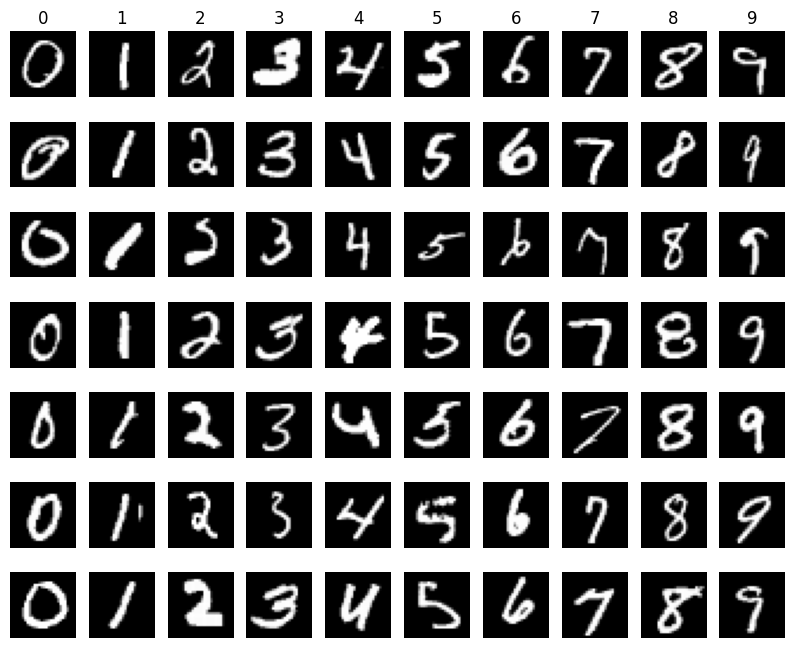

In [64]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = list(range(10))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((28, 28)))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

Data normalization is an important step which ensures that each input parameter has a similar data distribution. This makes convergence faster while training the network.

In [65]:
X_train, X_val, X_test = get_normalized_MNIST_data(X_train, X_val, X_test)

# Train a Good Model!
Open the file `solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train the best fully connected model that you can on MNIST, storing your best model in the `MNIST_best_model` variable. We require you to get at least 95% accuracy on the validation set using a fully connected network.

In [68]:
MNIST_best_model = None

################################################################################
# Train the best FullyConnectedNet model on the MNIST dataset. Experiment      #
# with hyperparameters such as the number of layers, hidden layer sizes,       #
# batch normalization, and regularization strength. Store your best model in   #
# the MNIST_best_model variable.                                               #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Prepare the MNIST data, ensuring labels are in integer format
data = {
    'X_train': X_train,
    'y_train': y_train.astype(int),
    'X_val': X_val,
    'y_val': y_val.astype(int),
    'X_test': X_test,
    'y_test': y_test.astype(int)
}

# Define the model with specific hyperparameters
# Experiment with hidden_dims, normalization, and reg to improve performance
model = FullyConnectedNet(
    category = 'classification',
    hidden_dims=[128, 64, 32],          # Example hidden layer sizes, adjust as needed
    normalization=[True, True, True],   # Enable batch normalization in each layer
    input_dim=784,                      # Input size for 28x28 MNIST images
    output_dim=10,                      # 10 output classes for digits 0-9
    reg=1e-4,                           # Regularization strength, adjust as needed
    weight_scale=1e-2,                  # Standard deviation for weight initialization
    dtype=np.float64                    # Use float64 for higher precision
)

# Set up the Solver with chosen parameters and learning rate decay
solver = Solver(
    model,
    data,
    update_rule=sgd_momentum,
    optim_config={
        'learning_rate': 1e-3,          # Learning rate, adjust for best results
    },
    lr_decay=0.95,                      # Learning rate decay over epochs
    num_epochs=10,                      # Increase epochs to allow more training
    batch_size=200,                     # Batch size for SGD
    print_every=100                     # Frequency of progress printing
)

# Train the model and save the solver and model
solver.train()

MNIST_solver = solver
MNIST_best_model = model


(Iteration 1 / 2500) loss: 2.305467
(Epoch 0 / 10) train acc: 0.123000; val_acc: 0.118900
(Iteration 101 / 2500) loss: 1.753964
(Iteration 201 / 2500) loss: 1.072654
(Epoch 1 / 10) train acc: 0.805000; val_acc: 0.809600
(Iteration 301 / 2500) loss: 0.862459
(Iteration 401 / 2500) loss: 0.653973
(Epoch 2 / 10) train acc: 0.950000; val_acc: 0.944800
(Iteration 501 / 2500) loss: 0.406672
(Iteration 601 / 2500) loss: 0.320500
(Iteration 701 / 2500) loss: 0.248140
(Epoch 3 / 10) train acc: 0.967000; val_acc: 0.960300
(Iteration 801 / 2500) loss: 0.210748
(Iteration 901 / 2500) loss: 0.213241
(Epoch 4 / 10) train acc: 0.981000; val_acc: 0.966000
(Iteration 1001 / 2500) loss: 0.144464
(Iteration 1101 / 2500) loss: 0.121685
(Iteration 1201 / 2500) loss: 0.111665
(Epoch 5 / 10) train acc: 0.989000; val_acc: 0.970900
(Iteration 1301 / 2500) loss: 0.076604
(Iteration 1401 / 2500) loss: 0.119443
(Epoch 6 / 10) train acc: 0.986000; val_acc: 0.972600
(Iteration 1501 / 2500) loss: 0.082855
(Iteration

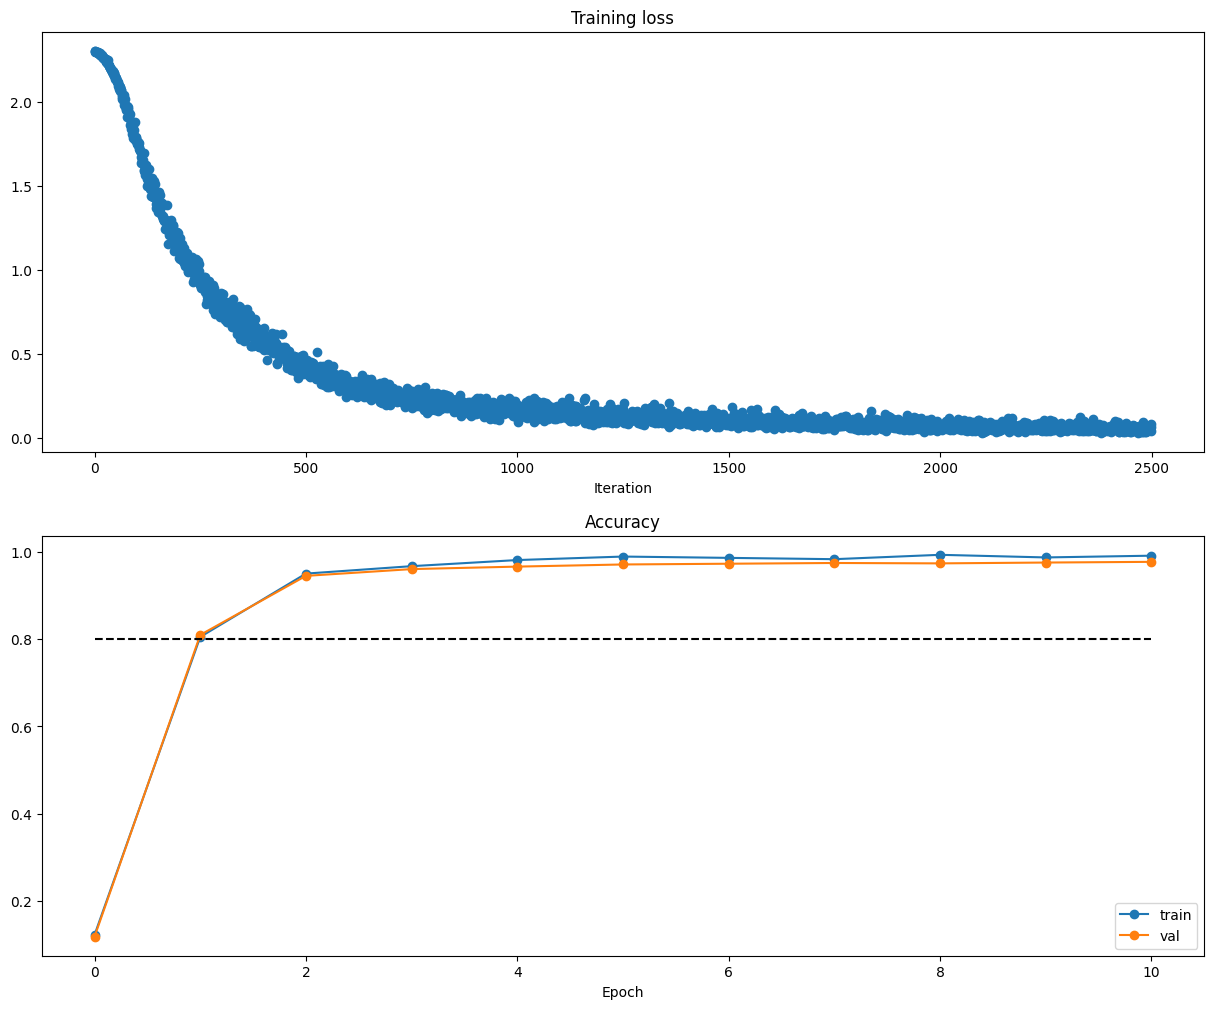

In [69]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(MNIST_solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(MNIST_solver.train_acc_history, '-o', label='train')
plt.plot(MNIST_solver.val_acc_history, '-o', label='val')
plt.plot([0.8] * len(MNIST_solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Test Your Model!
Run your best model on the validation and test sets. You should achieve at least 95% accuracy on the validation set.

In [70]:
y_test_pred = np.argmax(MNIST_best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(MNIST_best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.9769
Test set accuracy:  0.9747
